# Task 4: Predictive Modeling for Claim Severity

### import

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import shap
import matplotlib.pyplot as plt


### 1. Load Cleaned Data

In [16]:
df['HasClaim'] = df['TotalClaims'] > 0
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

### 2. Subset data for Claim Severity model

In [ ]:
df_claims = df[df['HasClaim'] == True].copy()

### 3. Feature/target selection

In [8]:
X_binary = df.drop(columns=['HasClaim', 'TotalClaims', 'CalculatedPremiumPerTerm'])
y_binary = df['HasClaim']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


### 4. Drop non-numeric and handle missing/infinite values

In [17]:
non_numeric_cols = Xc_train.select_dtypes(exclude='number').columns
Xc_train = Xc_train.drop(columns=non_numeric_cols)
Xc_test = Xc_test.drop(columns=non_numeric_cols)

Xc_train = Xc_train.replace([np.inf, -np.inf], np.nan).fillna(Xc_train.median())
Xc_test = Xc_test.replace([np.inf, -np.inf], np.nan).fillna(Xc_test.median())

### 5. Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(Xc_train, yc_train)
y_pred_lr = lr.predict(Xc_test)
rmse_lr = np.sqrt(mean_squared_error(yc_test, y_pred_lr))
r2_lr = r2_score(yc_test, y_pred_lr)

### 6. Random Forest

In [19]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Xc_train, yc_train)
y_pred_rf = rf.predict(Xc_test)
rmse_rf = np.sqrt(mean_squared_error(yc_test, y_pred_rf))
r2_rf = r2_score(yc_test, y_pred_rf)

### 7.XGBoost

In [20]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(Xc_train, yc_train)
y_pred_xgb = xgb_model.predict(Xc_test)
rmse_xgb = np.sqrt(mean_squared_error(yc_test, y_pred_xgb))
r2_xgb = r2_score(yc_test, y_pred_xgb)

### 8. Results Summary

In [21]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb],
    "R^2": [r2_lr, r2_rf, r2_xgb]
})
print("Model Performance Comparison:\n", results)

Model Performance Comparison:
                Model          RMSE       R^2
0  Linear Regression  1.748393e-10  1.000000
1      Random Forest  3.187292e+03  0.993548
2            XGBoost  6.321312e+03  0.974622


### 9. SHAP Analysis for XGBoost

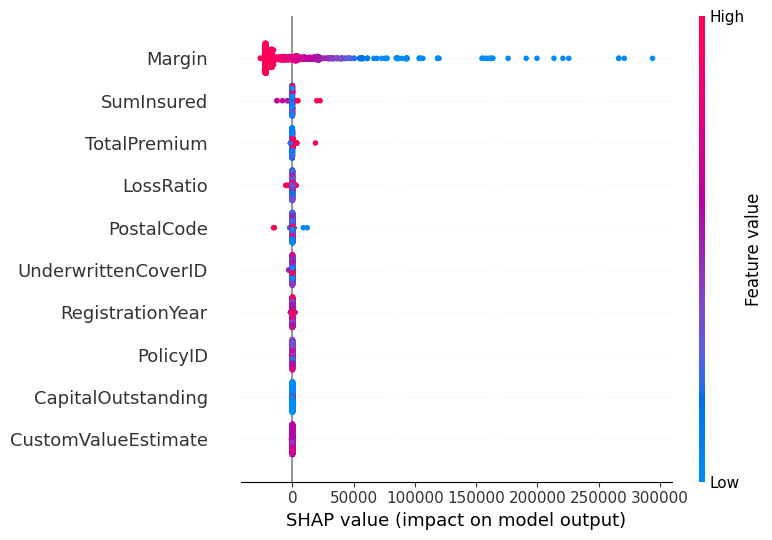

In [26]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(Xc_test)

# SHAP summary plot
shap.summary_plot(shap_values, Xc_test)

# Bar plot and Save summary results to CSV

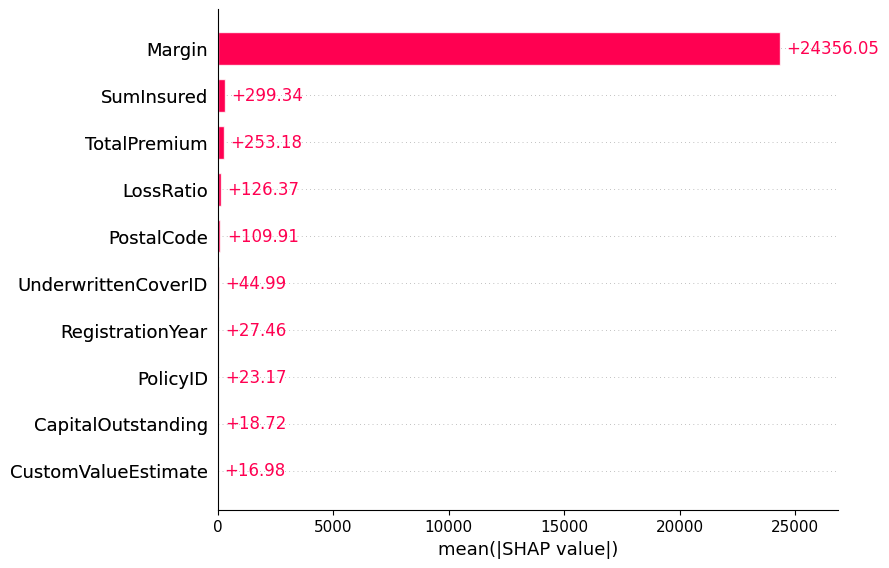

In [ ]:
shap.plots.bar(shap_values)

results.to_csv("model_comparison_results.csv", index=False)